In [3]:
import os
from dotenv import load_dotenv
from openai import OpenAI
from multiagentx import Env,Group,Agent

from IPython.display import Image

### Fully Connected Group

 
[2025-02-19 16:22:30][INFO]: All agents are fully connected
 
[2025-02-19 16:22:30][INFO]: Group initialized with ID 7daa39fc-aa54-4d42-b375-32c582a33765


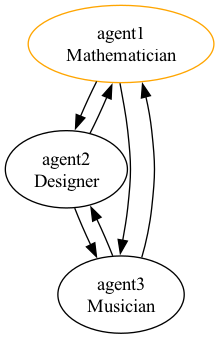

In [4]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY"),
    base_url=os.environ.get("OPENAI_BASE_URL"),
)
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician",
              description="Transfer to me if you need help with math.", 
              model_client=model_client,
              verbose=True),
              
        Agent(name="agent2", 
              role="Designer",
              description="Transfer to me if you need help with design.",
              model_client=model_client, # agent build with a openai model client
              verbose=True),

        Agent(name="agent3", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"), # agent build with a dify, access agent by token
              verbose=True),
    ],
)

# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2025-02-19 16:23:17][INFO]: User input (talk): can you recommend a good book on music theory?
 
[2025-02-19 16:23:18][INFO]: handoff from agent1 to agent3 by using auto mode
 
[2025-02-19 16:23:19][INFO]: Calling Dify agent [agent3]
 
[2025-02-19 16:23:19][INFO]: Sending request to Dify API
 
[2025-02-19 16:23:23][INFO]: Successfully received response from Dify API
 
[2025-02-19 16:23:23][INFO]: Agent agent3 response:

I highly recommend "Tonal Harmony" by Stefan Kostka and Dorothy Payne. This book is widely used in music theory courses and covers essential concepts such as harmony, voice leading, and analysis in a clear and structured way. Another excellent choice is "The Complete Musician" by Steven G. Laitz, which combines music theory, ear training, and keyboard skills for a comprehensive learning experience. Both books are great resources for understanding the intricacies of music theory!


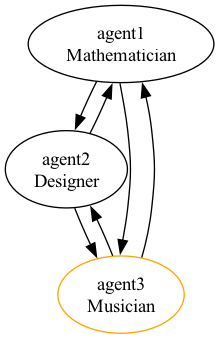

In [4]:
_ = g.chat("can you recommend a good book on music theory?")
Image(g.draw_relations())

### Custom Graph

 
[2024-12-20 10:21:37][INFO]: Self-defined relationships
 
[2024-12-20 10:21:37][INFO]: Group initialized with ID 0102bcfa-2467-4c48-be8f-c3184b4cee22


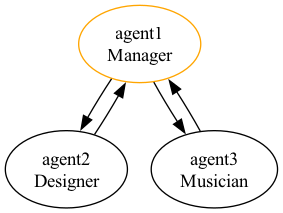

In [5]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Manager",
              description="Transfer to me if you don't know how to respond and don't know who to transfer to.",
              model_client=model_client,
              verbose=True),
              
        Agent(name="agent2", 
              role="Designer",
              description="Transfer to me if you need help with design.",
              model_client=model_client,
              verbose=True),

        Agent(name="agent3", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True)
    ],
    relationships={
        "agent1": ["agent2","agent3"],
        "agent2": ["agent1"],
        "agent3": ["agent1"]
    }
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

### Add or Remove Agents

 
[2024-12-20 10:21:40][INFO]: Self-defined relationships
 
[2024-12-20 10:21:40][INFO]: Succesfully add member agent4


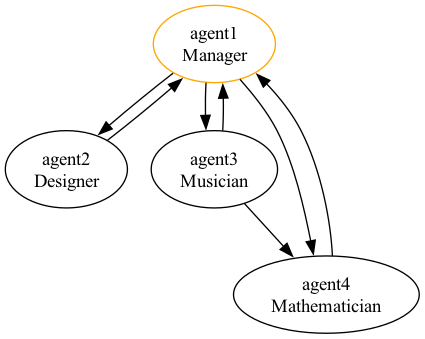

In [6]:
g.add_member(
    member=Agent(
        name="agent4",
        role="Mathematician",
        description="Transfer to me if you need help with math.",
        model_client=model_client,
    ),
    relation=[("agent1", "agent4"), ("agent4", "agent1"),("agent3", "agent4")]
)

Image(g.draw_relations())

 
[2024-12-20 10:21:41][INFO]: Self-defined relationships
 
[2024-12-20 10:21:41][INFO]: Successfully delete member agent3


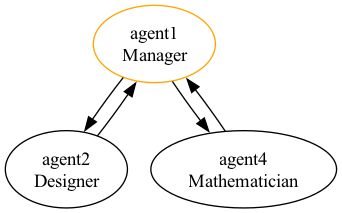

In [7]:
g.delete_member("agent3")

Image(g.draw_relations())

 
[2024-12-20 10:21:46][INFO]: User input (talk): how to do graphic design
 
[2024-12-20 10:21:46][INFO]: handoff from agent1 to agent2 by using auto mode
 
[2024-12-20 10:21:47][INFO]: Calling OpenAI agent [agent2]
 
[2024-12-20 10:21:51][INFO]: Agent agent2 response:

Graphic design involves a combination of artistic skill and technical knowledge. Here are some steps to help you get started:

1. **Learn the Fundamentals**: 
   - Understand the principles of design such as balance, contrast, hierarchy, alignment, repetition, and space.
   - Familiarize yourself with color theory, typography, and composition.

2. **Choose Your Tools**: 
   - Select software tools to use. Popular options include Adobe Photoshop, Illustrator, and InDesign.
   - Explore free alternatives like Canva, GIMP, or Inkscape, especially if you’re just starting.

3. **Practice**: 
   - Start creating simple projects. This could be anything from social media posts to flyers or logos.
   - Recreate designs you admir

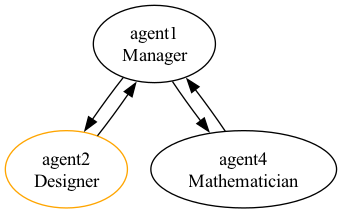

In [8]:
_ = g.chat("how to do graphic design")
Image(g.draw_relations())

 
[2024-12-20 10:21:55][INFO]: User input (talk): can you explain the concept of a derivative
 
[2024-12-20 10:21:56][INFO]: handoff from agent2 to agent1 by using auto mode
 
[2024-12-20 10:21:57][INFO]: handoff from agent1 to agent4 by using auto mode
 
[2024-12-20 10:22:01][INFO]: Agent agent4 response:

Sure! A derivative is a fundamental concept in calculus that represents the rate at which a function is changing at any given point. In simpler terms, it measures how a function's output value changes as its input value changes.

Here are some key points about derivatives:

1. **Definition**: Formally, the derivative of a function \( f(x) \) at a point \( x \) is defined as:
   \[
   f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
   \]
   This limit, if it exists, gives the slope of the tangent line to the curve at that point.

2. **Interpretation**:
   - If the derivative \( f'(x) \) is positive, it means the function is increasing at that point.
   - If \( f'(x) \) is negative, th

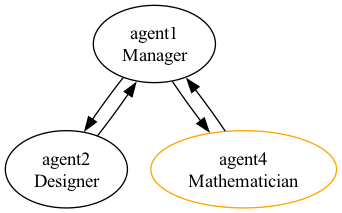

In [9]:
_ = g.chat("can you explain the concept of a derivative")
Image(g.draw_relations())

### Invate a new agent

 
[2025-01-08 10:50:48][INFO]: All agents are fully connected
 
[2025-01-08 10:50:48][INFO]: Group initialized with ID dca18ce6-555c-41e7-b9f7-72bf92360f19


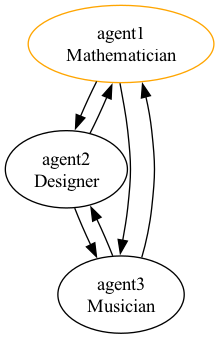

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician",
              description="Transfer to me if you need help with math.", 
              model_client=model_client,
              verbose=True),
              
        Agent(name="agent2", 
              role="Designer",
              description="Transfer to me if you need help with design.",
              model_client=model_client, # agent build with a openai model client
              verbose=True),

        Agent(name="agent3", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"), # agent build with a dify, access agent by token
              verbose=True)
    ],
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-20 10:22:13][INFO]: All agents are fully connected
 
[2024-12-20 10:22:13][INFO]: Succesfully add member agent4


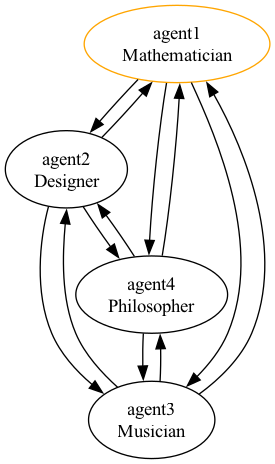

In [11]:
# invite a new member who is a philosopher and has relation with all other members
g.invite_member("a philosopher who calls himself agent4 , he is a big fan of plato and aristotle")
Image(g.draw_relations())

 
[2024-12-20 10:22:29][INFO]: User input (talk): can you explain the concept of existentialism
 
[2024-12-20 10:22:30][INFO]: handoff from agent1 to agent4 by using auto mode
 
[2024-12-20 10:22:31][INFO]: Calling OpenAI agent [agent4]
 
[2024-12-20 10:22:35][INFO]: Agent agent4 response:

Existentialism is a philosophical movement that emphasizes individual existence, freedom, and choice. It posits that people are responsible for creating their own meaning and essence through their actions and decisions, rather than inheriting them from external sources such as society, religion, or traditions.

At the core of existentialist thought is the belief that existence precedes essence. This means that rather than being born with a predetermined purpose or identity, individuals must forge their own path and define themselves through their experiences. Existentialists often grapple with themes such as:

1. **Absurdity**: The conflict between humans' search for meaning and the indifferent, cha

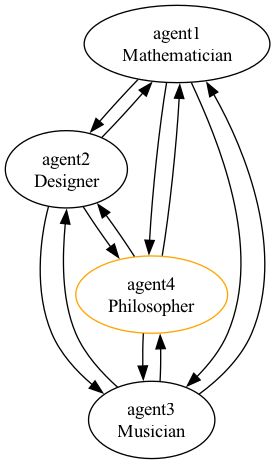

In [12]:
_ = g.chat("can you explain the concept of existentialism")
Image(g.draw_relations())

### Add Workspace for the group

In [16]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician",
              description="Transfer to me if you need help with math.", 
              model_client=model_client,
              verbose=True),
              
        Agent(name="agent2", 
              role="Designer",
              description="Transfer to me if you need help with design.",
              model_client=model_client, # agent build with a openai model client
              verbose=True),
    ],
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True,workspace="../workspace",group_id="test_group")

 
[2024-12-20 10:23:08][INFO]: Workspace directory ../workspace exists.
 
[2024-12-20 10:23:08][INFO]: Group workspace directory ../workspace/test_group created.
 
[2024-12-20 10:23:08][INFO]: Group workspace record file created.
 
[2024-12-20 10:23:08][INFO]: All agents are fully connected
 
[2024-12-20 10:23:08][INFO]: Group initialized with ID test_group
